In [564]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, util
from enum import Enum
import numpy as np
import numpy.typing as npt
from typing import List
import random as rand
import math

class Label(Enum):
  ANNUALCROP = 0
  FOREST = 1
  HERBACEOUSVEGETATIOM = 2
  HIGHWAY = 3
  INDUSTRIAL = 4
  PASTURE = 5
  PERMANENTCROP = 6
  RESIDENTIAL = 7
  RIVER = 8
  SEALAKE = 9

  __labels = {
    ANNUALCROP: "AnnualCrop",
    FOREST: "Forest",
    HERBACEOUSVEGETATIOM: "HerbaceousVegetation",
    HIGHWAY: "Highway",
    INDUSTRIAL: "Industrial",
    PASTURE: "Pasture",
    PERMANENTCROP: "PermanentCrop",
    RESIDENTIAL: "Residential",
    RIVER: "River",
    SEALAKE: "SeaLake"
  }

  @classmethod
  def string_label(cls, label: int):
    return cls.__labels[label]

class Sample:
  __img_name: str
  __img_array: npt.NDArray[np.float64]
  __img_label: Label

  @property
  def img_name(self):
    return self.__img_name

  @property
  def img_array(self):
    return self.__img_array

  @property
  def img_label(self):
    return self.__img_label

  def __init__(self, img_name: str, img_array: npt.NDArray[np.float64], img_label: Label) -> None:
    self.__img_name = img_name
    self.__img_array = img_array
    self.__img_label = img_label

  @classmethod
  def reading_list(cls, df: pd.DataFrame)->list:
    return list(map(lambda x:Sample(img_name=x[0], img_array=x[2], img_label=x[1]), df.values.tolist()))

  def __str__(self) -> str:
    return f"Image name: {self.__img_name} | Label: {self.__img_label}"

  def __repr__(self) -> str:
    return self.__str__()

TRAIN_DATA = "EuroSatData/train.csv"
TEST_DATA = "EuroSatData/test.csv"
VALIDATION_DATA = "EuroSatData/validation.csv"


In [75]:
train_df = pd.read_csv(TRAIN_DATA)
train_df["Filename"] = "EuroSatData/" + train_df["Filename"].astype(str)
test_df = pd.read_csv(TEST_DATA)
test_df["Filename"] = "EuroSatData/" + test_df["Filename"].astype(str)
validation_df = pd.read_csv(VALIDATION_DATA)
validation_df["Filename"] = "EuroSatData/" + validation_df["Filename"].astype(str)
all_data_df = pd.concat([train_df, test_df, validation_df], axis=0)

label_counts = all_data_df.value_counts("ClassName")

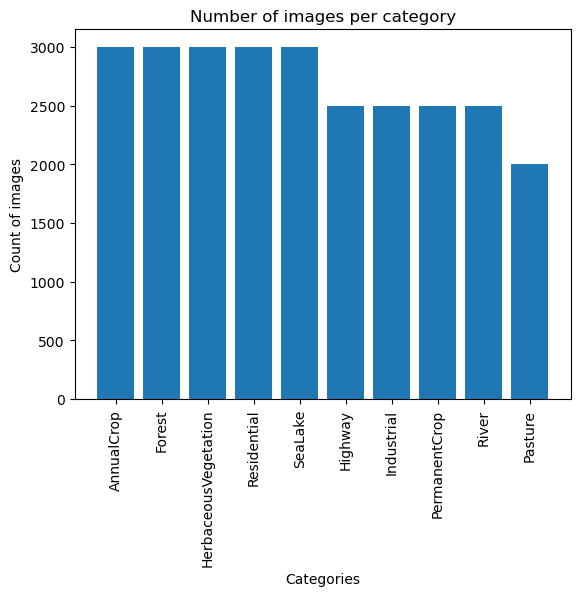

In [76]:
# Dataset Figure
labels = list(label_counts.keys())
counts = label_counts.values
plt.bar(labels, counts)
plt.title("Number of images per category")
plt.ylabel("Count of images")
plt.xticks(labels)
plt.xticks(rotation = 90)
plt.xlabel("Categories")
plt.show()

In [277]:
# Data Sample Figure
def read_img(path):
  return util.img_as_float64(io.imread(path))

test_path = "EuroSatData/River/River_64.jpg"
samples = train_df.sample(9)
samples = samples.drop(["ClassName", "Unnamed: 0"], axis=1)
samples["Image"] = samples["Filename"].apply(read_img)


In [278]:
samples_list = Sample.reading_list(samples)
samples_list

[Image name: EuroSatData/AnnualCrop/AnnualCrop_2290.jpg | Label: 0,
 Image name: EuroSatData/Pasture/Pasture_325.jpg | Label: 5,
 Image name: EuroSatData/Highway/Highway_582.jpg | Label: 3,
 Image name: EuroSatData/AnnualCrop/AnnualCrop_1109.jpg | Label: 0,
 Image name: EuroSatData/Residential/Residential_1130.jpg | Label: 7,
 Image name: EuroSatData/SeaLake/SeaLake_1144.jpg | Label: 9,
 Image name: EuroSatData/River/River_2310.jpg | Label: 8,
 Image name: EuroSatData/Highway/Highway_2224.jpg | Label: 3,
 Image name: EuroSatData/Industrial/Industrial_2378.jpg | Label: 4]

In [281]:
def plot_image(ax, img: npt.NDArray[np.float64], name: str):
  ax.imshow(img)
  img_name = name.split("/")[2]
  ax.set_title(img_name)

def display_images(sample_list: List[Sample], rows, columns):
  _, ax = plt.subplots(rows, columns, figsize=(16, 18))
  for r in range(rows):
    for c in range(columns):
      index = (r * columns) + c
      sample = sample_list[index]
      plot_image(ax[r][c], sample.img_array, sample.img_name)

[Image name: EuroSatData/AnnualCrop/AnnualCrop_2290.jpg | Label: 0,
 Image name: EuroSatData/Pasture/Pasture_325.jpg | Label: 5,
 Image name: EuroSatData/Highway/Highway_582.jpg | Label: 3,
 Image name: EuroSatData/AnnualCrop/AnnualCrop_1109.jpg | Label: 0,
 Image name: EuroSatData/Residential/Residential_1130.jpg | Label: 7,
 Image name: EuroSatData/SeaLake/SeaLake_1144.jpg | Label: 9,
 Image name: EuroSatData/River/River_2310.jpg | Label: 8,
 Image name: EuroSatData/Highway/Highway_2224.jpg | Label: 3,
 Image name: EuroSatData/Industrial/Industrial_2378.jpg | Label: 4]

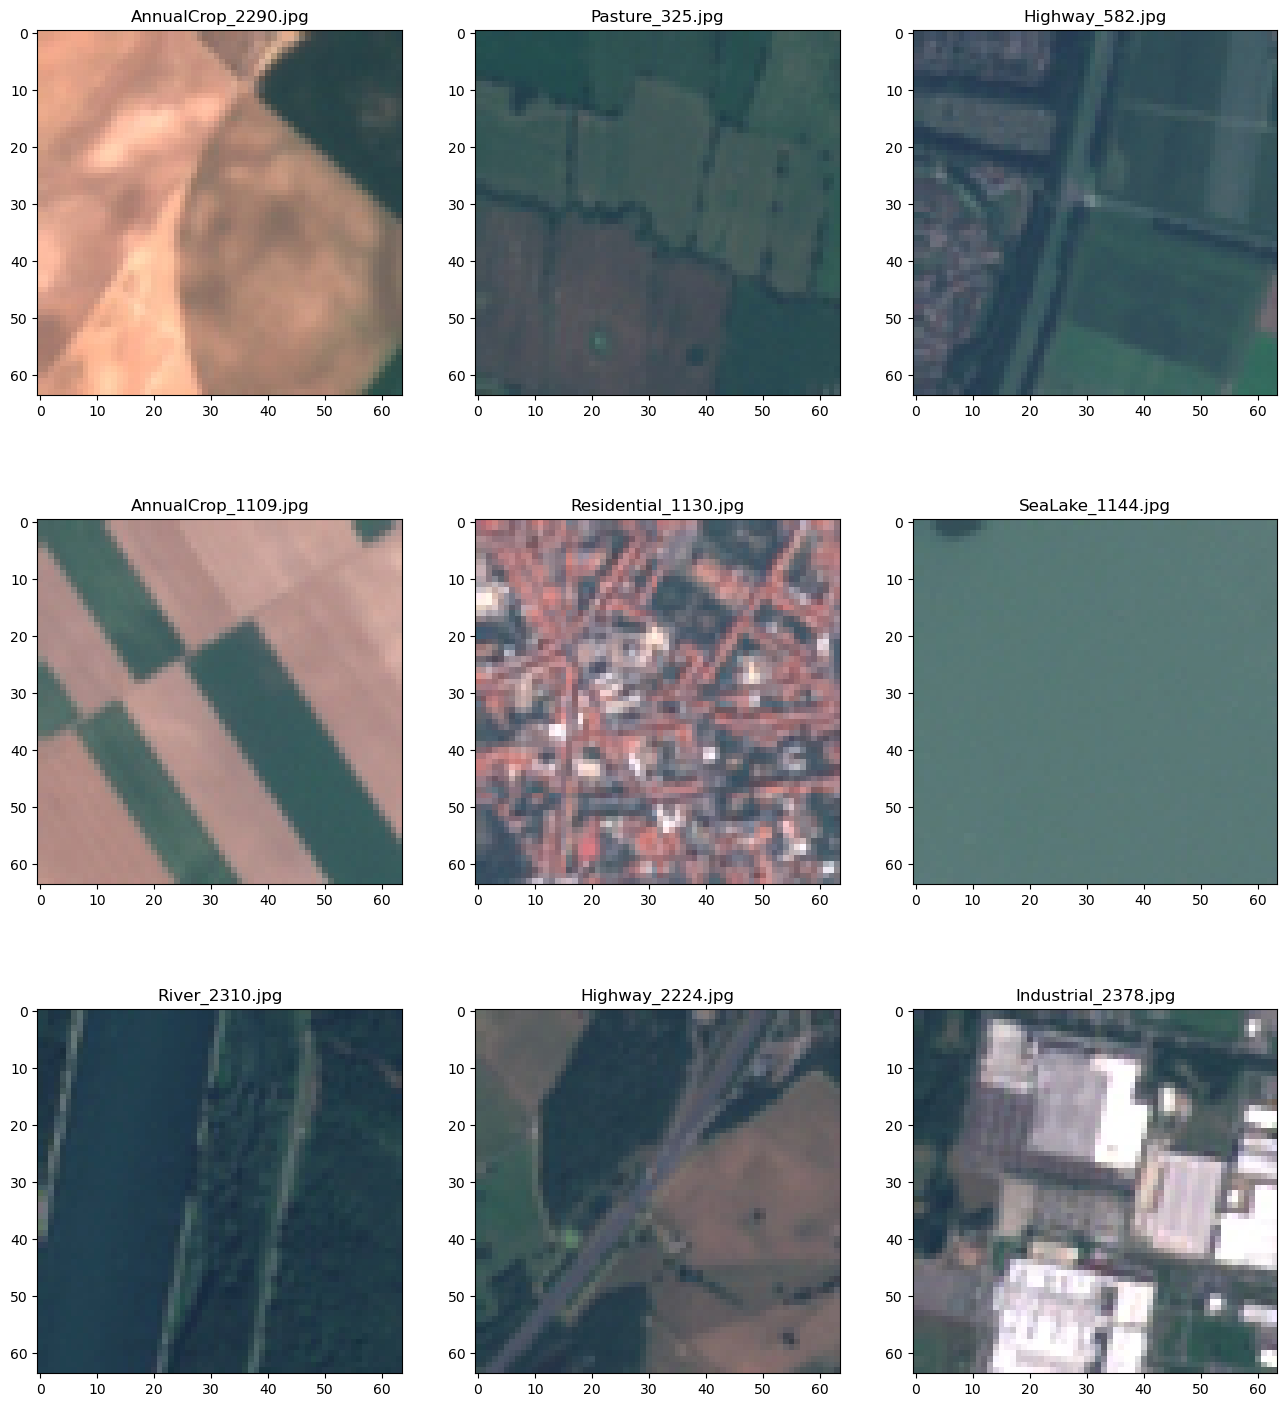

In [282]:
display_images(samples_list, 3, 3)
samples_list

In [625]:
# Proposed Results figure - Fake Data
def fake_exp_data(x_range, exp_range, uniform_variation, neg=False):
  rand_exp = rand.uniform(exp_range[0], exp_range[1])
  rand_exp = -1*rand_exp if neg else rand_exp
  return [(i + rand.uniform(uniform_variation[0], uniform_variation[1]))**rand_exp for i in x_range]

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def fake_acc_data(x_range, exp_range, uniform_variation, root):
  rand_exp = rand.uniform(exp_range[0], exp_range[1])
  max_val = x_range[1]
  accuracy = []
  for i in x_range:
    numerator = i + rand.uniform(uniform_variation[0], uniform_variation[1])
    value = (numerator/max_val)**rand_exp
    accuracy.append(sigmoid(value)**(root))
  return accuracy

In [546]:
# Fake loss values
train_loss = fake_exp_data(range(15), (0.8, 1), (5, 10), True)
validation_loss = fake_exp_data(range(15), (0.8, 1), (5, 10), True)


In [686]:
# Fake accuracy values
train_accuracy = fake_acc_data(x_range=range(15, 30), exp_range=(3, 5), uniform_variation=(15, 20), root=1/6)
validation_accuracy = fake_acc_data(x_range=range(15, 30), exp_range=(3, 5), uniform_variation=(15, 18), root=1/6)

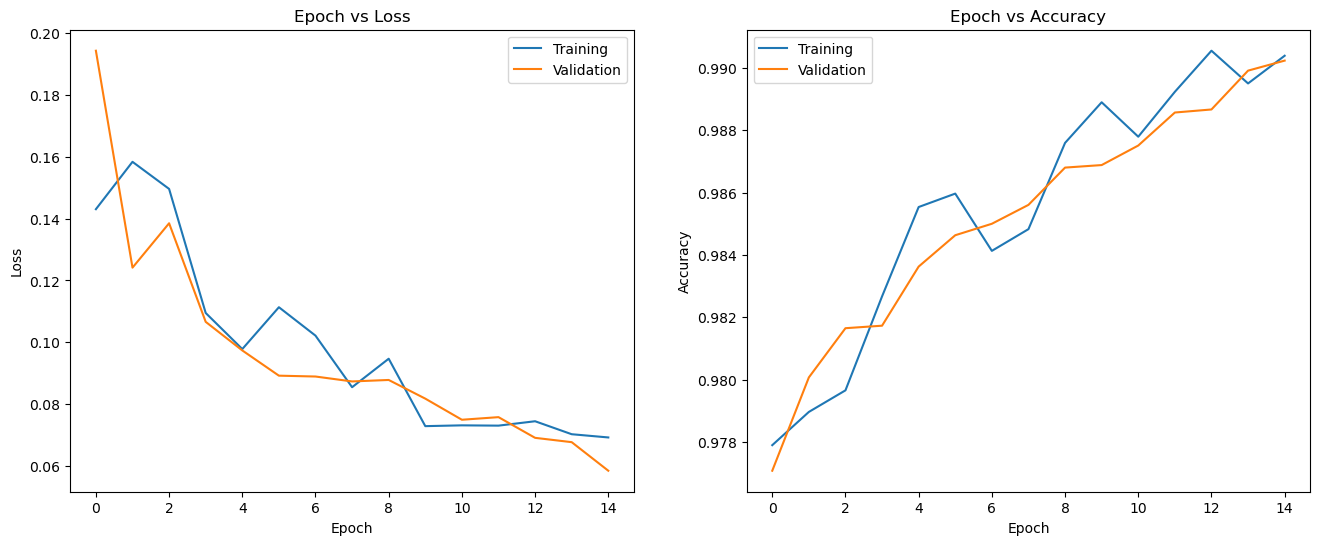

In [692]:

plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(validation_loss)
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"])

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.title("Epoch vs Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"])

plt.show()
